c:\Users\danie\miniconda3\envs\footballtracking\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data/dssLetters/test/
    ['Alef', 'Ayin', 'Bet', 'Dalet', 'Gimel', 'He', 'Het', 'Kaf', 'Kaf-final', 'Lamed', 'Mem', 'Mem-medial', 'Nun-final', 'Nun-medial', 'Pe', 'Pe-final', 'Qof', 'Resh', 'Samekh', 'Shin', 'Taw', 'Tet', 'Tsadi-final', 'Tsadi-medial', 'Waw', 'Yod', 'Zayin']
    accuracy                           0.95       922
              precision    recall  f1-score   support 
   macro avg       0.94      0.91      0.92       922
weighted avg       0.95      0.95      0.95       922



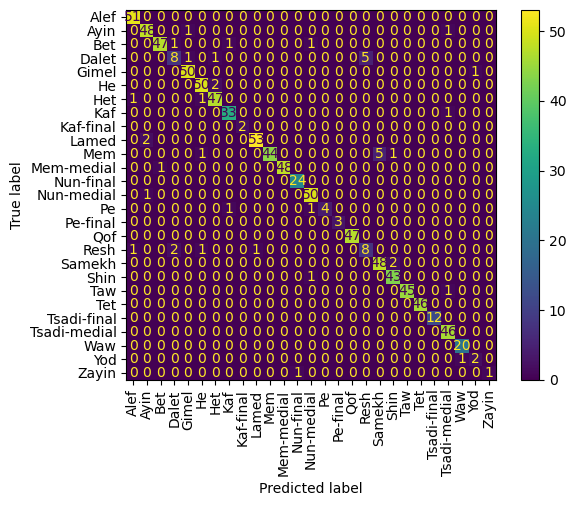

In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_management.loadDSSCharacters import dssLettersDataset
from classification_models.CNN_models import CharacterCNN, LeNet5, DanNet1

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



test_dir = 'Data/dssLetters/test/'

test_set = dssLettersDataset(folder_path= test_dir)
characterClasses = test_set.characterClasses # a list of all the class names

BATCH_SIZE = 32


test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, num_workers=1)


# calculate steps per epoch for training and validation set
testSetlength = len(test_loader.dataset)
testBatchesSteps = len(test_loader.dataset) // BATCH_SIZE



# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5()#.to(device)\

#criterion = nn.CrossEntropyLoss()
PATH = "classification_models/model_L5.pth"
#checkpoint = torch.load(path_to_model)
model.load_state_dict(torch.load(PATH, map_location=device))  # map_location makes it possible to load the model trained on a gpu, onto a cpu (for eval)
model.to(device)


def evaluate_model(model, testDataLoader, device, classes):

    ground_truths = []
    predictions = []
    model.eval()

    with torch.no_grad():
        for data in testDataLoader:
            images, labels = data
            images = images.to(device)
            #print(images.shape)
            labels = labels.to(device)
            
            outputs = model(images) #file_name
            preds = torch.argmax(outputs, dim=1)

            #print(preds)

            [ground_truths.append(label.item()) for label in labels]
            [predictions.append(pred.item()) for pred in preds]
            #print(preds)              
        CM=confusion_matrix(ground_truths, predictions, labels=np.arange(27))

        # this prints the precision, recall and f1-score for each class, and averaged over all classes
        #print(classification_report(ground_truths, predictions, target_names=classes))
          
    return CM


# evaluate the model on the testing set (same set as the validation set)
CM = evaluate_model(model,test_loader,device, classes=characterClasses)

      
print('    accuracy                           0.95       922\n              precision    recall  f1-score   support \n   macro avg       0.94      0.91      0.92       922\nweighted avg       0.95      0.95      0.95       922\n')
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=test_set.characterClasses)
disp.plot()

plt.xticks(rotation=90)
plt.show()


In [13]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_management.loadDSSCharacters import dssLettersDataset
from classification_models.CNN_models import CharacterCNN, LeNet5, DanNet1

from segment import Segment

# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LeNet5()#.to(device)\

#criterion = nn.CrossEntropyLoss()
PATH = "classification_models/model_L5.pth"
#checkpoint = torch.load(path_to_model)
model.load_state_dict(torch.load(PATH, map_location=device))  # map_location makes it possible to load the model trained on a gpu, onto a cpu (for eval)
model.to(device)

model.eval()


LeNet5(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=84, out_features=27, bias=True)
)

In [ ]:
import cv2
from data_management.augmentation.commonAug import whitespaceRemover

img_path = ""

gray_img = cv2.imread(img_path, cv2.GRA)


In [5]:
import cv2
from segment import Segment


if __name__ == "__main__":

    path="sample-test-2023/25-Fg001.pbm"

    #a = Segment()
    segmenter = Segment("sample-test-2023")
    image = cv2.imread(path)
    segmenter.segment_page(image=image)

'hi'
'labels'


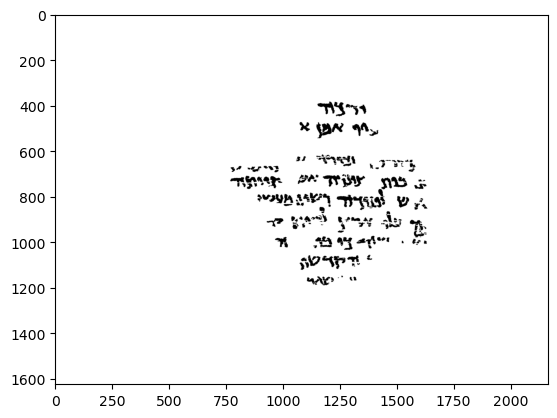

In [6]:
image = cv2.imread(path)
plt.imshow(image)

In [1]:
hebrewCharacters = {
    "Alef" : '\u05d0',
    "Ayin" : '\u05e2', # fix
    "Bet" : '\u05d1',
    "Dalet" : '\u05d3',
    "Gimel" : '\u05d2',
    "He" : '\u05d4',
    "Het" : '\u05d7',
    "Kaf" : '\u05db',
    "Kaf-final" : '\u05da',
    "Lamed" : '\u05dc',
    "Mem" : '\u05dd',  # should be "mem-final" but leave it for now
    "Mem-medial" : '\u05de', 
    "Nun-final" : '\u05df',
    "Nun-medial" : '\u05e0',
    "Pe" : '\u05e4',
    "Pe-final" : '\u05e3',
    "Qof" : '\u05e7',
    "Resh" : '\u05e8',
    "Samekh" : '\u05e1',
    "Shin" : '\u05e9',
    "Taw" : '\u05ea',
    "Tet" : '\u05d8',
    "Tsadi-final" : '\u05e5',
    "Tsadi-medial" : '\u05e6',
    "Waw" : '\u05d5', # fix
    "Yod" : '\u05d9',
    "Zayin" :'\u05d6' 
}

In [2]:
hebrewCharacters

{'Alef': 'א',
 'Ayin': 'ע',
 'Bet': 'ב',
 'Dalet': 'ד',
 'Gimel': 'ג',
 'He': 'ה',
 'Het': 'ח',
 'Kaf': 'כ',
 'Kaf-final': 'ך',
 'Lamed': 'ל',
 'Mem': 'ם',
 'Mem-medial': 'מ',
 'Nun-final': 'ן',
 'Nun-medial': 'נ',
 'Pe': 'פ',
 'Pe-final': 'ף',
 'Qof': 'ק',
 'Resh': 'ר',
 'Samekh': 'ס',
 'Shin': 'ש',
 'Taw': 'ת',
 'Tet': 'ט',
 'Tsadi-final': 'ץ',
 'Tsadi-medial': 'צ',
 'Waw': 'ו',
 'Yod': 'י',
 'Zayin': 'ז'}

In [8]:
import os

for filename in os.listdir('Data/Segmented/'):
    print(filename)

page__character_0_x=1003y=788w=45h=43.png
page__character_0_x=1061y=783w=113h=48.png
page__character_0_x=1065y=702w=86h=46.png
page__character_0_x=1072y=472w=49h=44.png
page__character_0_x=1097y=1057w=70h=59.png
page__character_0_x=1105y=1149w=105h=44.png
page__character_0_x=1128y=881w=68h=33.png
page__character_0_x=1141y=974w=78h=51.png
page__character_0_x=1146y=474w=123h=73.png
page__character_0_x=1151y=383w=125h=67.png
page__character_0_x=1155y=616w=82h=49.png
page__character_0_x=1172y=1059w=57h=54.png
page__character_0_x=1174y=705w=81h=55.png
page__character_0_x=1175y=786w=38h=63.png
page__character_0_x=1223y=1060w=54h=61.png
page__character_0_x=1235y=711w=314h=151.png
page__character_0_x=1237y=977w=71h=60.png
page__character_0_x=1252y=620w=51h=50.png
page__character_0_x=1257y=701w=106h=61.png
page__character_0_x=1275y=394w=59h=51.png
page__character_0_x=1304y=475w=76h=63.png
page__character_0_x=1322y=972w=89h=59.png
page__character_0_x=1379y=504w=42h=33.png
page__character_0_x=146

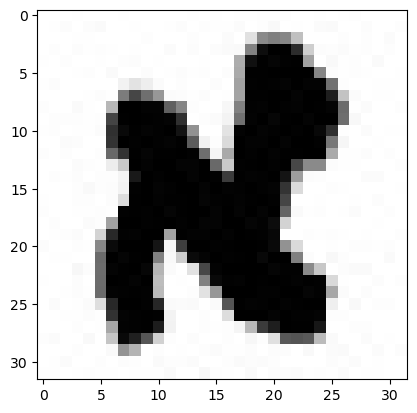

In [15]:
from PIL import Image
import torchvision.transforms as transforms
import cv2
from data_management.augmentation.commonAug import imgResizer

model.eval()

path = "Data/Segmented/page__character_0_x=1003y=788w=45h=43.png"
path = "Data/dssLetters/test/Alef/navis-QIrug-Qumran_extr09_0112-line-005-y1=665-y2=792-zone-HUMAN-x=1907-y=0048-w=0032-h=0038-ybas=0089-nink=483-segm=COCOS5cocos.jpg"

convert_tensor = transforms.ToTensor()

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)


img = imgResizer(img, desired_size=32)
plt.imshow(img, cmap='gray')
plt.show()
#img = np.expand_dims(img, 0)
im_pil = Image.fromarray(img)

input_img = convert_tensor(im_pil).to(device)

input_img = torch.unsqueeze(input_img, 0)

output = model(input_img)

In [16]:
output

tensor([[ 50.7983, -26.6639, -57.6877, -43.5289,   1.1916, -18.3525,  18.2302,
         -63.8973, -98.9738, -41.1816, -28.0399, -70.8486, -32.4038, -43.6705,
         -93.9850, -59.4049,  11.2670, -16.3347, -19.6596, -29.5572, -19.4375,
         -12.1273,   1.3573, -12.6196, -41.9615, -33.9311, -30.3774]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [18]:
torch.argmax(output, 1).item()

0

In [1]:
from docx import Document

document = Document()
document.save('test.docx')

ModuleNotFoundError: No module named 'exceptions'